## Simple Linear Regression

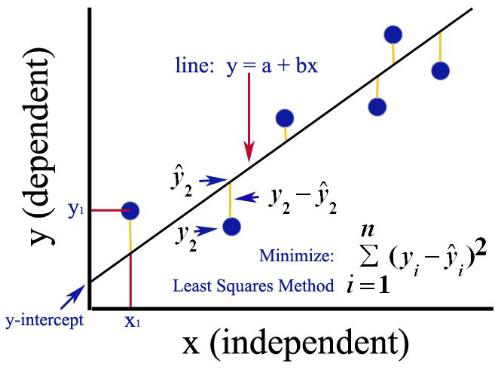

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Data Ingestion
Load the training data which contains target column

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Your goal is to Predict the Profit, Profit is the Target Feature or Y

## Step 2 - Perform the Basic Data Quality Checks

In [3]:
df.shape

(50, 5)

In [4]:
#Missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
#Check duplicates in dataframe
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Step 3 - Data Visualization

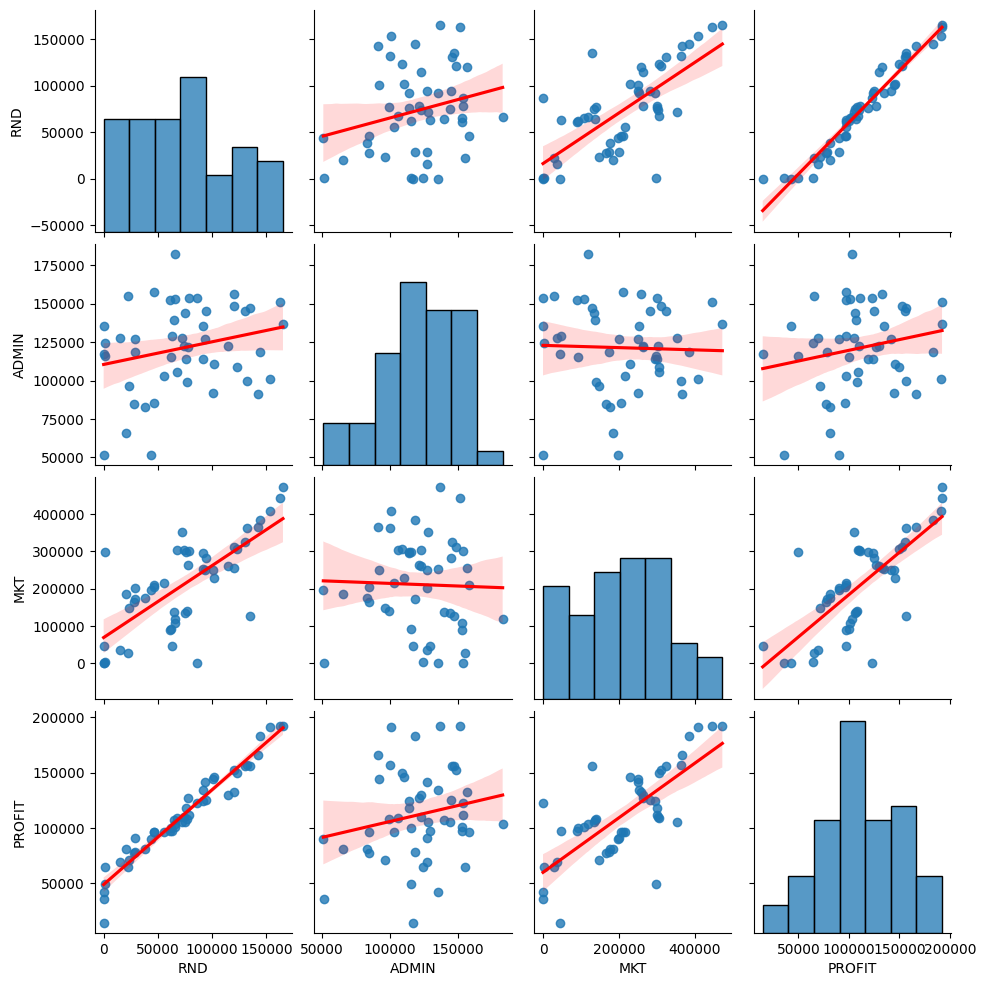

In [7]:
import seaborn as sns
sns.pairplot(df, kind="reg", plot_kws={"line_kws" : {"color" : "red"}})

In [8]:
corr = df.corr(numeric_only = True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

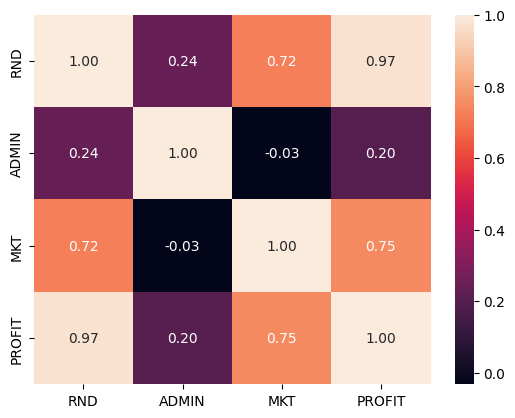

In [9]:
sns.heatmap(data=corr,annot=True,fmt=".2f")

## From above visualization PROFIT and RND are Strongly Corelated

1. Target Feature - PROFIT(Y)
2. Predictor Feature - RND(X)
3. PROFIT ~ RND
4. PROFIT = B0 + B1 * RND

## Step 4 - Separate X(RND) and Y(PROFIT)

In [10]:
df.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [11]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [12]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [13]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4 - Build the model

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
#Model intercept
model.intercept_

array([49032.89914125])

In [16]:
#Model coefficient
model.coef_

array([[0.85429137]])

## PROFIT_pred = 49032.90 + 0.8543 * RND
### If RND increases by 1, Profit will increase by 0.8543

<Axes: xlabel='RND', ylabel='PROFIT'>

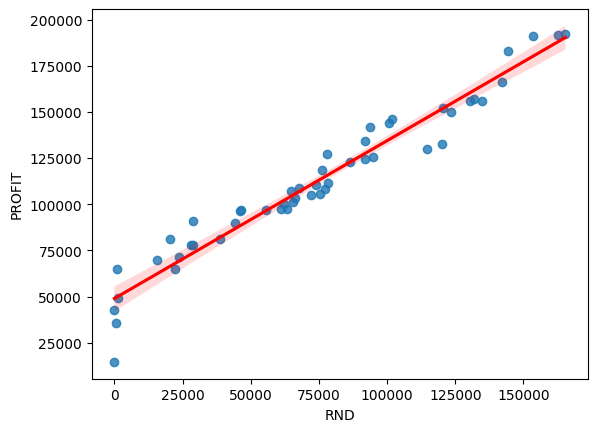

In [17]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color" : "red"})

## Step 6 - Model Evaluation

In [18]:
# R2 Score for Data
model.score(X,Y)

0.9465353160804393

In [19]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [20]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error, 
    mean_absolute_percentage_error, 
    r2_score
    ) 

In [22]:
def evaluate_model(model, x, y):
    #Predict the result from model
    ypred = model.predict(X)
    #Calculate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    #Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 Score : {r2:.2%}")

In [23]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 Score : 94.65%


## As R2 score is greater than 80%, This model is a good model
## You can use the above model for out of sample prediction
## Step 7 - Out of Sample Prediction

In [24]:
X.head().values

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [26]:
rnd = 2_0_000

profit = model.predict([[rnd]]).round(2) # type: ignore
print(profit)

[[66118.73]]
